In [3]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv("C:/Users/Sema/Downloads/survey.csv")

In [7]:
print("eksik veri sayısı:")
print(df.isnull().sum())

eksik veri sayısı:
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [73]:
age_mean = np.mean(df['Age'])
age_median = np.median(df['Age'])
print(f"Age Mean: {age_mean}")
print(f"Age Median: {age_median}")

Age Mean: 965679.8379666402
Age Median: 31.0


In [15]:
df['Age'] = df['Age'].fillna(age_median)

In [17]:
df['state'] = df['state'].fillna('Unknown')

In [19]:
df['self_employed'] = df['self_employed'].fillna('Unknown')

In [21]:
df['work_interfere'] = df['work_interfere'].fillna('Unknown')

In [27]:
print("Eksik veri sayısı:")
print(df.isnull().sum())

Eksik veri sayısı:
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                           0
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [29]:
df=df.drop(columns=['comments'])

In [31]:
df.to_csv("C:/Users/Sema/Downloads/cleaned_survey.csv", index=False)

In [33]:
print("\nİlk 5 satır:")
print(df.head())


İlk 5 satır:
             Timestamp  Age  Gender         Country    state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States       IL       Unknown   
1  2014-08-27 11:29:37   44       M   United States       IN       Unknown   
2  2014-08-27 11:29:44   32    Male          Canada  Unknown       Unknown   
3  2014-08-27 11:29:46   31    Male  United Kingdom  Unknown       Unknown   
4  2014-08-27 11:30:22   31    Male   United States       TX       Unknown   

  family_history treatment work_interfere    no_employees  ...   anonymity  \
0             No       Yes          Often            6-25  ...         Yes   
1             No        No         Rarely  More than 1000  ...  Don't know   
2             No        No         Rarely            6-25  ...  Don't know   
3            Yes       Yes          Often          26-100  ...          No   
4             No        No          Never         100-500  ...  Don't know   

                leave mental_health_consequence 

In [37]:
df['treatment'] = df['treatment'].map({'Yes' : 1, 'No' : 0})
df['self_empoleyed'] = df['self_employed'].map({'Yes' : 1, 'No' : 0, 'Unknown' : np.nan})

In [39]:
df['Age'] = df['Age'].astype(int)

In [43]:
bins = [0, 18, 35, 50, 100]
labels = ['0-17', '18-34', '35-49', '50-100']
df['Age_Group'] = pd.cut(df['Age'],bins=bins, labels=labels,  right=False)

In [45]:
print("\nVeri Setininİlk 5 Satırı:")
print(df.dtypes)


Veri Setininİlk 5 Satırı:
Timestamp                      object
Age                             int32
Gender                         object
Country                        object
state                          object
self_employed                  object
family_history                 object
treatment                       int64
work_interfere                 object
no_employees                   object
remote_work                    object
tech_company                   object
benefits                       object
care_options                   object
wellness_program               object
seek_help                      object
anonymity                      object
leave                          object
mental_health_consequence      object
phys_health_consequence        object
coworkers                      object
supervisor                     object
mental_health_interview        object
phys_health_interview          object
mental_vs_physical             object
obs_consequence        

In [49]:
print(df['Age_Group'].value_counts())

Age_Group
18-34     863
35-49     356
50-100     32
0-17        3
Name: count, dtype: int64


In [51]:
print(df.describe())

                Age    treatment  self_empoleyed
count  1.259000e+03  1259.000000     1241.000000
mean   9.656798e+05     0.505957        0.117647
std    3.426354e+07     0.500163        0.322320
min   -1.726000e+03     0.000000        0.000000
25%    2.700000e+01     0.000000        0.000000
50%    3.100000e+01     1.000000        0.000000
75%    3.600000e+01     1.000000        0.000000
max    1.215752e+09     1.000000        1.000000


In [55]:
print(df['treatment'].value_counts())
print(df['treatment'].value_counts())

treatment
1    637
0    622
Name: count, dtype: int64
treatment
1    637
0    622
Name: count, dtype: int64


In [59]:
import matplotlib.pyplot as plt

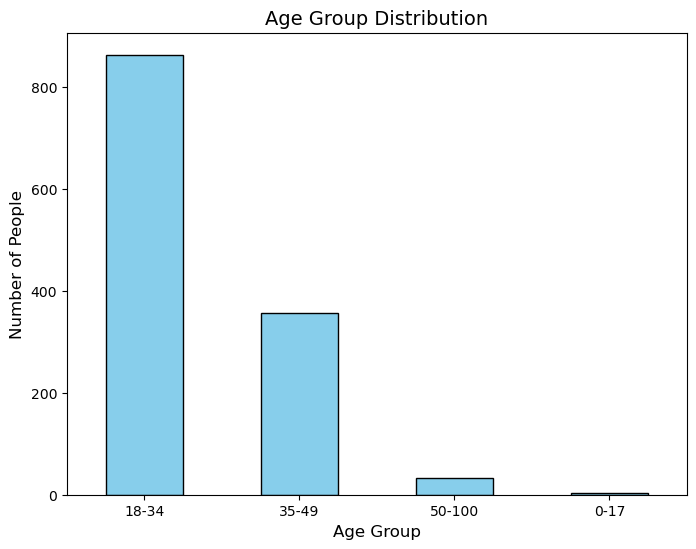

In [61]:
plt.figure(figsize=(8, 6))
df['Age_Group'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Age Group Distribution', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=0)
plt.show()

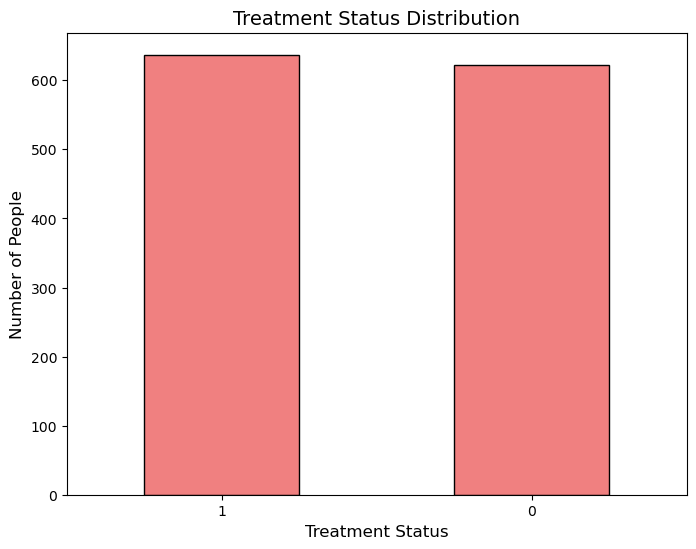

In [65]:
plt.figure(figsize=(8, 6))
df['treatment'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Treatment Status Distribution', fontsize=14)
plt.xlabel('Treatment Status', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=0)
plt.show()

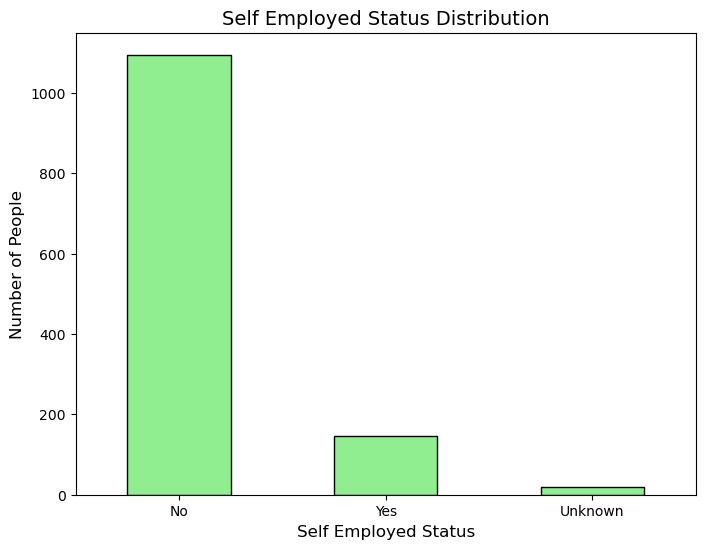

In [67]:
plt.figure(figsize=(8, 6))
df['self_employed'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Self Employed Status Distribution', fontsize=14)
plt.xlabel('Self Employed Status', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [79]:
age_group_means = df.groupby('Age_Group', observed = False)['Age'].mean().values
print("Average age by age group:", age_group_means)

Average age by age group: [ 8.         28.23174971 39.31460674 55.25      ]


In [91]:
def calculate_group_statistics(df):
    for group in df['Age_Group'].unique():
        group_data = df[df['Age_Group'] == group]['Age']
        if not group_data.empty:
            mean = np.mean(group_data)
            median = np.median(group_data)
            print(f"Age Group: {group} - Mean: {mean}, Median: {median}")
        else:
            print(f"Age Group: {group} - No data available.")
calculate_group_statistics(df)

Age Group: 35-49 - Mean: 39.31460674157304, Median: 39.0
Age Group: 18-34 - Mean: 28.23174971031286, Median: 29.0
Age Group: 50-100 - Mean: 55.25, Median: 55.0
Age Group: nan - No data available.
Age Group: 0-17 - Mean: 8.0, Median: 8.0
